In [6]:
# Dependencies
import json
import requests
from config import weather_api_key
from pprint import pprint

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Bujumbura"
units = "metric"

In [3]:
# Build query URL and request your results in Celsius
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

In [7]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': -3.3822, 'lon': 29.3644},
 'dt': 1634326298,
 'id': 425378,
 'main': {'feels_like': 24.13,
          'grnd_level': 924,
          'humidity': 79,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 23.65,
          'temp_max': 23.65,
          'temp_min': 23.65},
 'name': 'Bujumbura',
 'sys': {'country': 'BI', 'sunrise': 1634269365, 'sunset': 1634313213},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 347, 'gust': 2.19, 'speed': 1.38}}


In [10]:
# Get the temperature from JSON response
temperature = weather_json["main"]["temp"]
temperature

23.65

In [11]:
# Report temperature
print(f" The temperature in Bujumbura is {temperature} C.")

 The temperature in Bujumbura is 23.65 C.


In [13]:
# Bonus

# use list of units
units = ["metric", "imperial"]

# set up list to hold two different temperatures
temperatures = []

# loop through the list of units and append them  to temperatures list 
for unit in units:
    # Build query URL based on current element in units
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    # Get temperature from JSON response
    temperature = weather_json["main"]["temp"]
    
    temperatures.append(temperature)

# Report temperature by accessing each element in the list
print(f"The temperature in Bujumbura is {temperatures[0]}C or {temperatures[1]}F.")

The temperature in Bujumbura is 23.65C or 74.57F.


In [15]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import weather_api_key

In [16]:
# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build a parial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [19]:
cities = ["Houston", "Boston", "Paris", "London", "Oslo", "Beijing"]

# set up lists to hold response info
lat = []
temp = []
dic = []

# Loop through the cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    a = {
        "city": response['name'],
        "lat": response['coord']['lat'],
        "lon": response['coord']['lon'],
        "temp": response['main']['temp']   
    }
    dic.append(a)
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    
print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [29.7633, 42.3584, 48.8534, 51.5085, 59.9127, 39.9075]
The temperature information received is: [89.53, 69.42, 54.97, 52.43, 43.3, 44.49]


In [20]:
dic

[{'city': 'Houston', 'lat': 29.7633, 'lon': -95.3633, 'temp': 89.53},
 {'city': 'Boston', 'lat': 42.3584, 'lon': -71.0598, 'temp': 69.42},
 {'city': 'Paris', 'lat': 48.8534, 'lon': 2.3488, 'temp': 54.97},
 {'city': 'London', 'lat': 51.5085, 'lon': -0.1257, 'temp': 52.43},
 {'city': 'Oslo', 'lat': 59.9127, 'lon': 10.7461, 'temp': 43.3},
 {'city': 'Beijing', 'lat': 39.9075, 'lon': 116.3972, 'temp': 44.49}]

In [27]:
weather_data = pd.DataFrame(dic)
weather_data.set_index('city')

,lat,lon,temp
city,,,
Houston,29.7633,-95.3633,89.53
Boston,42.3584,-71.0598,69.42
Paris,48.8534,2.3488,54.97
London,51.5085,-0.1257,52.43
Oslo,59.9127,10.7461,43.30
Beijing,39.9075,116.3972,44.49


In [23]:
# create a data frame for cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}

weather_dict = pd.DataFrame(weather_dict)
weather_dict.head()

,city,lat,temp
0,Houston,29.7633,89.53
1,Boston,42.3584,69.42
2,Paris,48.8534,54.97
3,London,51.5085,52.43
4,Oslo,59.9127,43.30


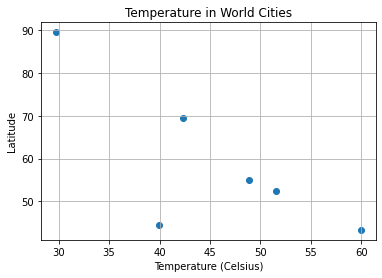

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [26]:
# 2.6
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# store the url
base_url = "https://api.tvmaze.com/search/shows?q="

In [40]:
# store the name and rating of shows in the list
show_title = []
rating = []
networks = []

# Sample shows to query
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This is Us", "The Flash",
            "Vikings", "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]


# networks.append(response[0]["show"]["network"]["name"])

# loop through tv show titles, make requests and parse
for show in tv_shows:
    target_url = base_url + show
    response = requests.get(target_url).json()
    show_title.append(response[0]["show"]["name"])
    rating.append(response[0]["show"]["rating"]["average"])

In [55]:
# create dataframe
show_df = pd.DataFrame({
    "title": show_title,
    "rating": rating
    
})

show_df.append

<bound method DataFrame.append of             title  rating
0  Altered Carbon     8.1
1  Grey's Anatomy     7.9
2      This Is Us     7.9
3       The Flash     7.8
4         Vikings     8.7
5       Shameless     8.5
6           Arrow     7.4
7  Peaky Blinders     8.7
8     Dirk Gently     7.3>

In [60]:
tv_show_networks =("Netflix", "ABC", "NBC", "The CW", "History", "Showtime", "The CW", "BBC", "BBC")

In [61]:
show_df["Network"] = np.array(tv_show_networks)
show_df

,title,rating,Network
0,Altered Carbon,8.1,Netflix
1,Grey's Anatomy,7.9,ABC
2,This Is Us,7.9,NBC
3,The Flash,7.8,The CW
4,Vikings,8.7,History
5,Shameless,8.5,Showtime
6,Arrow,7.4,The CW
7,Peaky Blinders,8.7,BBC
8,Dirk Gently,7.3,BBC


<AxesSubplot:xlabel='title'>

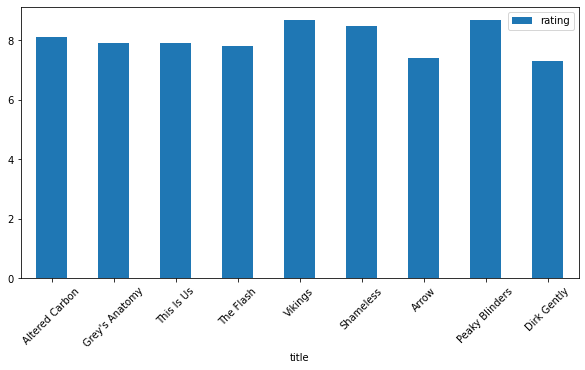

In [62]:
show_df.plot(x='title', y='rating', kind='bar', figsize=(10,5), rot=45)

<AxesSubplot:xlabel='title'>

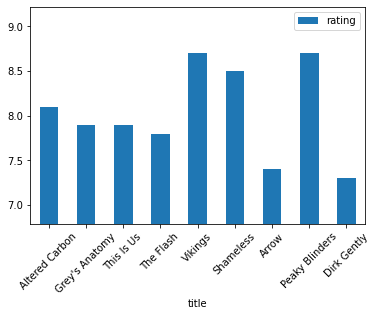

In [65]:
st = show_df["rating"].std()
show_df.plot(x='title', y='rating', kind='bar', rot=45, ylim=(show_df["rating"].min()-st, show_df["rating"].max()+st))

In [66]:
#2.7
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import weather_api_key

In [68]:
# save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
    
# Create search query, make request and store in json
query_url = f"{url}appid={api_key}&units={units}&q="

In [70]:
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "New York", "Seattle", "Dallas", "Taipei"]

# set up  lists to hold the response info
temperature = []
latitude = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    latitude.append(response['coord']['lat'])
    temperature.append(response['main']['temp'])
    
print(f"The latitude information received is: {latitude}")
print(f"The temperature information received is: {temperature}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [11.84, 9.44, 5.75, 3.94, 27.99, 23.06, 14.79, 23.16, 25.94]


In [74]:
# create a dataframe from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": latitude,
    "temp": temperature
    }

weather_data = pd.DataFrame(weather_dict)
weather_data.set_index("city")

,lat,temp
city,,
Paris,48.8534,11.84
London,51.5085,9.44
Oslo,59.9127,5.75
Beijing,39.9075,3.94
Mumbai,19.0144,27.99
New York,40.7143,23.06
Seattle,47.6062,14.79
Dallas,32.7668,23.16
Taipei,25.0478,25.94


<AxesSubplot:>

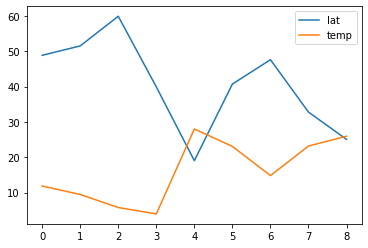

In [88]:
weather_data[["lat", "temp"]].plot()

<function matplotlib.pyplot.show(close=None, block=None)>

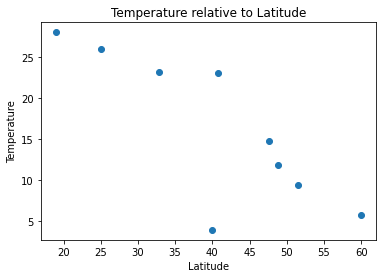

In [77]:
# create a scatter plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature relative to Latitude')
plt.show

In [79]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0    11.583137
1    10.095340
2     5.386012
3    16.596009
4    28.303544
5    16.143915
6    12.282010
7    20.597330
8    24.922703
Name: lat, dtype: float64


In [80]:
# create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.56x +38.96


The r-squared is: 0.6604132917822406


<function matplotlib.pyplot.show(close=None, block=None)>

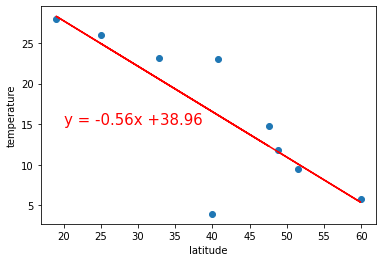

In [81]:
# create a plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# label plot and annotate the line equation
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.annotate(line_eq,(20,15), fontsize=15, color="red")

# print r square values
print(f"The r-squared is: {rvalue**2}")

# show plot
plt.show

In [82]:
# Calculate the temperature for Florence at 43.77 degress
florence_lat = 43.77
florence_predict_temp = round(slope * florence_lat + intercept,2)

print(f"The predicited temperature for Florence will be {florence_predict_temp}.")

The predicited temperature for Florence will be 14.43.


In [86]:
# use the API to determine actual temperature
response = requests.get(query_url + "Florence").json()
florence_actual_temp = response['main']['temp']

print(f"The actual temperature for Florence is {florence_actual_temp}.")

The actual temperature for Florence is 9.4.


In [87]:
print(rvalue, pvalue, stderr)

-0.8126581641639002 0.007760497875457813 0.15187315222351658


In [91]:
#2.8 TRY

students = {
    # Name  : Age
    "James": 27,
    "Sarah": 19,
    "Jocelyn": 28
}

print(students["Jezebel"])

print("This line will never print")

KeyError: 'Jezebel'

In [103]:
import sys
try:
    print(students["James"])
    a = 4
    b = 0 
    d = a / b
except KeyError:
    print("we have KeyError") 
except ZeroDivisionError:
    print("we have ZeroDivisionError")
    print(f"we have unexpected error: sys.exc_info()")
finally:
    print("anyway")

27
we have ZeroDivisionError
we have unexpected error: sys.exc_info()
anaway


In [104]:
students = {
    # Name  : Age
    "James": 27,
    "Sarah": 19,
    "Jocelyn": 28
}

# Try to access key that doesn't exist
try:
    students["Jezebel"]
except KeyError:
    print("Oops, that key doesn't exist.")
except TypeError:
    print("Oops, you wrote a typo AGAIN :).")
except (RuntimeError, NameError):
    print("oops, that key doesn't exist.")
except:
    print(f"Unexpected error: {sys.exc_into()}")
finally:
    print("This line will be printed anyway!")
    print('-----------------')
# Catching the errors lets the rest of our code execute
    print("... But the program doesn't die early!")    

Oops, that key doesn't exist.
This line will be printed anyway!
-----------------
... But the program doesn't die early!


In [ ]:
#2.9


In [109]:
try:
    print("Infinity looks like + " + str(10 / 0) + ".")
except ZeroDivisionError: 
    print("I think you break math")
try:
    print("I think her name was + " + name + "?")
except NameError:
    print("You forgot her name")
try:
    print("Your name is a nonsense number. Look: " + int("Gabriel"))
except ValueError:
    print("You don't have a barcode")

print("You made it through the gauntlet--the message survived!")

I think you didn't break math
You forgot her name
You don't have a barcode
You made it through the gauntlet--the message survived!


In [113]:
#2.9 
# Dependencies
import json
import requests
import pandas as pd

In [114]:
# list of character
search_character = ['R2-D2', 'Darth Vader', 'Godzilla', 'Luke Skywalker', 'Frodo', \
              'Boba Fett', 'Iron Man', 'Jon Snow', 'Han Solo']

# set url for API
url = 'https://swapi.dev/api/people/?search='

# set empty lists to hold character's height and mass
height = []
mass = []
sw_character = []

# Loop through each character and make API request
for character in search_character:
    
    # create search query, make request and store in json
    response_json = requests.get(url + character).json()
    
    # try to grab  the height and mass if they are in the api
    try:
        height.append(response_json['results'][0]['height'])
        mass.append(response_json['results'][0]['mass'])
        sw_character.append(character)
        print(f"{character} found! Appending results")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        err = sys.exc_info()
        print(f"Unexpected error: {str(err[0])} {str(err[1])}")
        print(f"Character {character} not found")
        pass

R2-D2 found! Appending results
Darth Vader found! Appending results
Unexpected error: <class 'IndexError'> list index out of range
Character Godzilla not found
Luke Skywalker found! Appending results
Unexpected error: <class 'IndexError'> list index out of range
Character Frodo not found
Boba Fett found! Appending results
Unexpected error: <class 'IndexError'> list index out of range
Character Iron Man not found
Unexpected error: <class 'IndexError'> list index out of range
Character Jon Snow not found
Han Solo found! Appending results


In [117]:
# Create DataFrame
character_height = pd.DataFrame({
    'character': sw_character,
    'height': height,
    'mass': mass
})
character_height

,character,height,mass
0,R2-D2,96,32
1,Darth Vader,202,136
2,Luke Skywalker,172,77
3,Boba Fett,183,78.2
4,Han Solo,180,80


In [ ]:
# This owuld have been cool
#  except:
#        # Append null values
#        err = sys.exc_info()
#    try:
#        print(f'Help me {name}, youre my only hope!")
#    except NameError:
#        print("Stop where you are")
#    try:
#        print(f" {height} aren't you a little short to be a stormtrooper?)      
#    except ValueError:
#        print(f"These aren't the droids we're looking for)
#    print("They may go about their business + " + name + "?")3

#    except:

In [132]:
#2.10
# Dependencies
import requests

url = "http://api.worldbank.org/v2/"
api_format = "json"

# get the country info from JSON format
countries_response = requests.get(f"{url}countries?format={api_format}").json()

# first element is general info, and second is country's names
countries = countries_response[1]

In [134]:
#Report the names
all = []
for country in countries:
    url = f"http://api.worldbank.org/v2/country/{country['iso2Code']}?format=json"
    print(country["name"])
    req = requests.get(url).json()[1][0]
#    print(req)
    dict_a = {
        "id": country['id'],
        "iso2Code": country['iso2Code'],
        "name": country['name'],
        "incomeLevel": req['incomeLevel']['value']     
        }
    all.append(dict_a)
    print(url)
                           

Aruba
http://api.worldbank.org/v2/country/AW?format=json
Africa Eastern and Southern
http://api.worldbank.org/v2/country/ZH?format=json
Afghanistan
http://api.worldbank.org/v2/country/AF?format=json
Africa
http://api.worldbank.org/v2/country/A9?format=json
Africa Western and Central
http://api.worldbank.org/v2/country/ZI?format=json
Angola
http://api.worldbank.org/v2/country/AO?format=json
Albania
http://api.worldbank.org/v2/country/AL?format=json
Andorra
http://api.worldbank.org/v2/country/AD?format=json
Arab World
http://api.worldbank.org/v2/country/1A?format=json
United Arab Emirates
http://api.worldbank.org/v2/country/AE?format=json
Argentina
http://api.worldbank.org/v2/country/AR?format=json
Armenia
http://api.worldbank.org/v2/country/AM?format=json
American Samoa
http://api.worldbank.org/v2/country/AS?format=json
Antigua and Barbuda
http://api.worldbank.org/v2/country/AG?format=json
Australia
http://api.worldbank.org/v2/country/AU?format=json
Austria
http://api.worldbank.org/v2/c

In [ ]:
# First element is general information, second is countries themselves

In [136]:
# Report the names
df = pd.DataFrame(all)
df.head()

,id,iso2Code,name,incomeLevel
0,ABW,AW,Aruba,High income
1,AFE,ZH,Africa Eastern and Southern,Aggregates
2,AFG,AF,Afghanistan,Low income
3,AFR,A9,Africa,Aggregates
4,AFW,ZI,Africa Western and Central,Aggregates


In [137]:
df["incomeLevel"].value_counts()

High income            16
Aggregates             14
Upper middle income    10
Lower middle income     6
Low income              4
Name: incomeLevel, dtype: int64

In [ ]:
#2.12

In [138]:
# Dependencies
import requests
url = "http://api.worldbank.org/v2/"

In [139]:
# Get the list of lending types the world bank has
lending_response = requests.get(f"{url}lendingTypes?format=json").json()[1]

In [140]:
print(json.dumps(lending_response, indent=4))

[
    {
        "id": "IBD",
        "iso2code": "XF",
        "value": "IBRD"
    },
    {
        "id": "IDB",
        "iso2code": "XH",
        "value": "Blend"
    },
    {
        "id": "IDX",
        "iso2code": "XI",
        "value": "IDA"
    },
    {
        "id": "LNX",
        "iso2code": "XX",
        "value": "Not classified"
    }
]


In [141]:
lending_types = [x["id"] for x in lending_response]
lending_types

['IBD', 'IDB', 'IDX', 'LNX']

In [142]:
lending_types = {}
for lend in lending_types:
    lendingtype[lend] = []
    url2 = f"http://api.worldbank.org/v2/country?lendingtype={lend}&format=json"
    response = requests.get(url2).json()[1]
    for country in response:
        lendingtype[lend].append(country["name"])
    

In [147]:
# print(response[0]["name"])
for lend in lending_types:
    print(lend, len(lendingtype[lend]))

In [148]:
lending_types = [lending_type["id"] for lending_type in lending_response]
lending_types

['IBD', 'IDB', 'IDX', 'LNX']

In [149]:
# Next determine how many countries fall into each lending type
# Hint: Look at the first element of the response array.
country_count_by_type = {}
for lending_type in lending_types:
    query = f"{url}countries?lendingType={lending_type}&format=json"
    response = requests.get(query).json()
    country_count_by_type[lending_type] = response[0]["total"]
country_count_by_type

{'IBD': 140, 'IDB': 30, 'IDX': 118, 'LNX': 74}

In [150]:
for k, v in country_count_by_type.items():
    print(k, v)

IBD 140
IDB 30
IDX 118
LNX 74


In [151]:
# Print the number of countries of each lending type
for key, value in country_count_by_type.items():
    print(f"The number of countries with lending type {key} is {value}.")

The number of countries with lending type IBD is 140.
The number of countries with lending type IDB is 30.
The number of countries with lending type IDX is 118.
The number of countries with lending type LNX is 74.


In [105]:
# Your assignment is to get the last line to print without changing any
# of the code below. Instead, wrap each line that throws an error in a
# try/exept block.

try:
    print("Infinity looks like + " + str(10 / 0) + ".")
except ZeroDivisionError:
    print("Woops. Can't do that.")

try:
    print("I think her name was + " + name + "?")
except NameError:
    print("Oh, I forgot to define 'name'. D'oh.")

try:
    print("Your name is a nonsense number. Look: " + int("Gabriel"))
except ValueError:
    print("Drat. 'Gabriel' isn't a number?")

print("I made it through the gauntlet. The message survived!")

Woops. Can't do that.
Oh, I forgot to define 'name'. D'oh.
Drat. 'Gabriel' isn't a number?
I made it through the gauntlet. The message survived!
